In [1]:
import csv
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from pylab import scatter, show, legend, xlabel, ylabel

INPUT_LAYER = 2    #NO. of nodes in input layer
HIDDEN_LAYER = 2   #NO. of nodes in hidden layer
OUTPUT_LAYER = 1   #NO. of nodes in otput layer
learning_rate = 0.1 #Learning rate
lamda = 0.0        #Regularisation not taken in consideration
epochs = 1500     #Number of iterations
def displayData(X,Y):             #Displays data
    for i in range(len(X)):
        if(Y[i]==1):           # 1 is marked by o
            plt.scatter(X[i][0], X[i][1],marker = 'o',color = 'b',s = 30)
        else:                  # 0 is marked by x
            plt.scatter(X[i][0],X[i][1],marker = 'x' , color = 'r',s = 30)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(['1','0'])
    plt.show()
    return

def Randomise():
    #Here the value of each element of Theta_1,Theta_2 lies between [-Epsilon_init,+Epsilon_init]
    EPSILON_INIT = 0.12
    Theta_1 = np.random.rand(HIDDEN_LAYER,INPUT_LAYER+1)*(2*EPSILON_INIT)-(EPSILON_INIT)     # Random Weights for level 1
    Theta_2 = np.random.rand(OUTPUT_LAYER,HIDDEN_LAYER+1)*(2*EPSILON_INIT)-(EPSILON_INIT)    # Random Weights for level 2
    return Theta_1,Theta_2

def sigmoid(z):
    t = 1.0/(1.0 + np.exp(-1.0 * z))       #Sigmoid function
    return t

def sigmoidGradient(z):
    p = sigmoid(z)
    q = 1 - p
    return np.multiply(p,q)                #returns the derivative of sigmoid value for any z. np.multiply() returns elementwise multiplication of 2 matrices

def ForwardProp(a1,Theta_1,Theta_2):
    a1 = [[1],[a1[0]],[a1[1]]]             # bias value added to features and converted to 3x1 matrix
    z2 = np.matmul(Theta_1,a1)             #np.matmul() returns matrix multiplication
    a2 = sigmoid(z2)                       #Activation values for layer 2
    a2 = [[1],[a2[0]],a2[1]]               #Bias value added to layer 2 actvation values and converted to 3x1 matrix
    z3 = np.matmul(Theta_2,a2)
    h = sigmoid(z3)                        #Activation value for layer 3
    h = [h[0]]                             #Just converting to matrix of size 1x1
    return h,z3,a2,a1

def costfunction_NN(X,Y,Theta_1,Theta_2):
    H = []
    for i in range(len(X)):
        h,z3,a2,a1 = ForwardProp(X[i],Theta_1,Theta_2) #z3,a2,a1 are useless here.They are included to maintain the pattern
        H = H + h      #Forming output matrix
    Y = [[Y[0]],[Y[1]],[Y[2]],[Y[3]]]     #Actual output matrix in 4x1 matrix
    J = 0.0                               #cost initialised to zero
    #Now calculate cost
    #np.transpose() returns transpose of matrix
    #np.log() retuns elementwise logarithm of matrix
    #np.ones() returns matrix with all ones in required shape
    J = (-1.0/4)*(np.matmul(np.transpose(Y),np.log(H)) + np.matmul(np.transpose(np.ones((4,1),dtype = float)-Y),np.log(np.ones((4,1),dtype = float)-H)))
    return J

def Train_NN(X,Y,Theta_1,Theta_2):
    Theta1_grad = np.zeros(np.shape(Theta_1))     #Defining initial gradient matrices for Theta_1 and Theta_2
    Theta2_grad = np.zeros(np.shape(Theta_2))
    for x in range(epochs):                       #for each iteration
        for i in range(len(X)):                   #len(X) = size of dataset o number of training examples
            h,z3,a2,a1 = ForwardProp(X[i],Theta_1,Theta_2)  #Forward Propogation for eacg training example
            # h is output value
            #a1,a2 are activation values for layer1 and layer 2 respectively.
            #z3 is basically matrix product of Theta_2 and a2.
            """Backward Propogation"""
            delta_3 = h[0] - Y[i]                     #Error in layer 3
            delta_3 = [[delta_3[0]]]                  #Just converting to 1x1 matrix
            delta_2 = np.multiply(np.matmul(np.transpose(Theta_2),delta_3),sigmoidGradient(z3)) #Error in layer 2
            delta_2 = [delta_2[1],delta_2[2]]     #just converted delta_2 to 2x1 matrix

            #No delta_1 defined because it is feature matrix which is errorless

            Theta2_grad = np.divide(Theta2_grad + np.matmul(delta_3,np.transpose(a2)),4)    #finding gradient values for Theta_1 and Theta_2
            #np.divide() divides each element of matrix with a certain number .
            Theta1_grad = np.divide(Theta1_grad + np.matmul(delta_2,np.transpose(a1)),4)

        Theta_1 = Theta_1 - ((learning_rate)*(Theta1_grad))     #Updating Theta_1
        Theta_2 = Theta_2 - ((learning_rate)*(Theta2_grad))     #Updating Theta_2
        cost = costfunction_NN(X,Y,Theta_1,Theta_2)             #Calculating cost
        plt.scatter(x,cost,marker = 'x',color = 'r')            #Plotting graph of cost vs number of iterations
        #cost should always decrease with each iteration.
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
    plt.show()
    return Theta_1,Theta_2

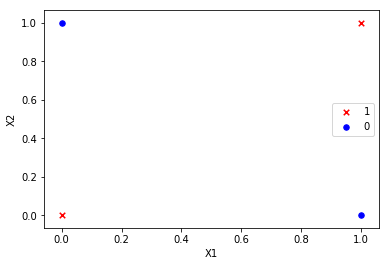

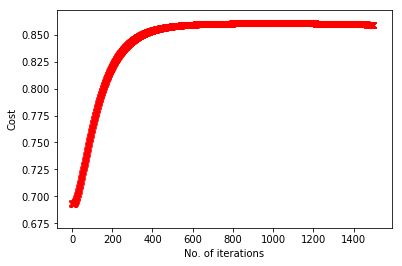

In [2]:
X = []
Y = []
with open("XOR.csv","r") as csvfile:      #importing data from csv file
    lines = csv.reader(csvfile)
    dataset = list(lines)
    for i in range(len(dataset)):
        X.append([int(dataset[i][0]),int(dataset[i][1])])      #Feature matrix formation
        Y.append(int(dataset[i][2]))                           #Output matrix formation
displayData(X,Y)                                               #Displaying the data
Theta_1,Theta_2 = Randomise()                                  #Randomising Theta_1,Theta_2
Theta_1,Theta_2 = Train_NN(X,Y,Theta_1,Theta_2)                 #Training Neural Network